/usr/local/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Desperdício:  3.591932059447981


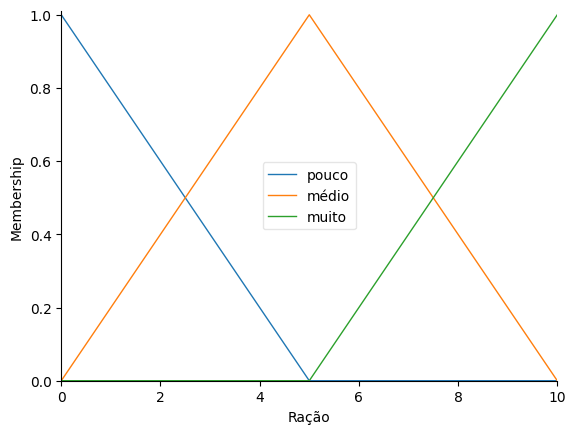

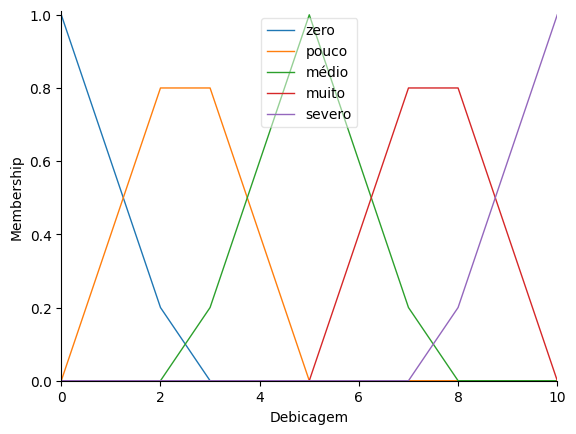

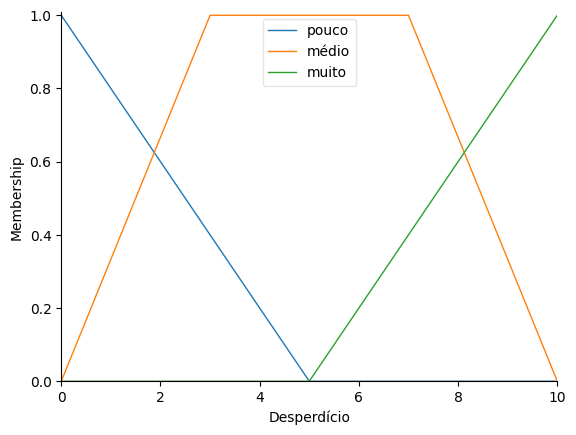

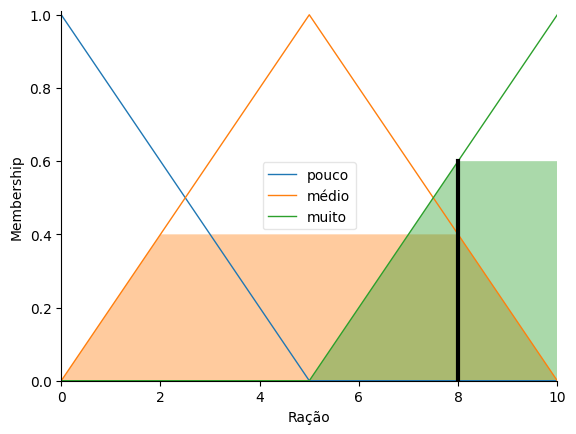

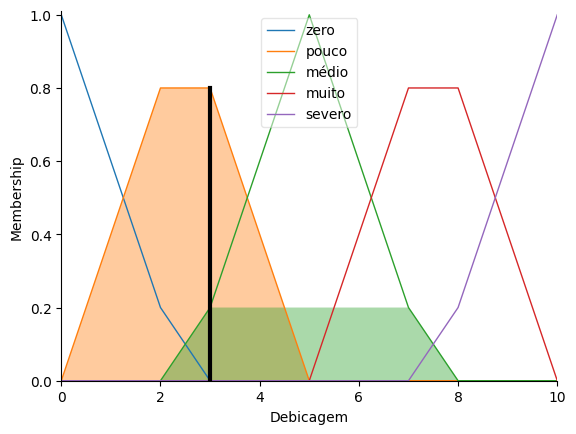

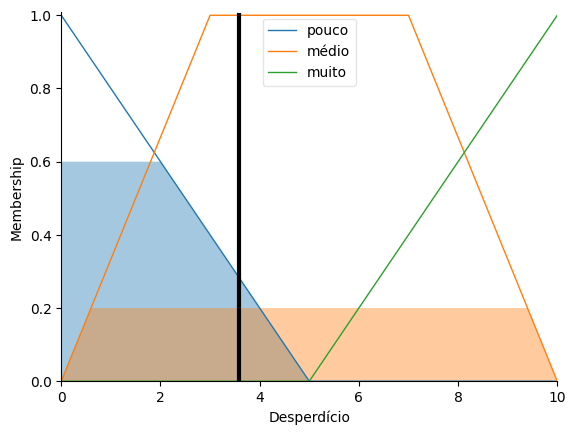

In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Problema: O quanto o nível de debicagem de frangos influencia no desperdício de ração. 
# Variáveis de entrada:
# - Nível de debicagem
# - Nível de ração ofertada
# Variável de saída:
# - Nível de ração desperdiçada

# Declaração das variáveis de entrada e saida
racao = ctrl.Antecedent(np.arange(0, 11, 1), 'Ração')
debicagem = ctrl.Antecedent(np.arange(0, 11, 1), 'Debicagem')
desperdicio = ctrl.Consequent(np.arange(0, 11, 1), 'Desperdício')

# A função "automf" cria automaticamente o mapeamento entre valores 
# usando uma função de pertinência triângular
# esta função pode ser usada para 3, 5 ou 7 valores de uma variável
racao.automf(names=['pouco', 'médio', 'muito'])
debicagem.automf(names=['zero','pouco','médio', 'muito', 'severo'])

# Já para a variavel de saída foram usadas duas funções tringulares e um trapezoidal
desperdicio['pouco'] = fuzz.trimf(desperdicio.universe, [0, 0, 5])
desperdicio['médio'] = fuzz.trapmf(desperdicio.universe, [0, 3, 7, 10])
desperdicio['muito'] = fuzz.trimf(desperdicio.universe, [5, 10, 10])

# Visualização das variáveis
racao.view()
debicagem.view()
desperdicio.view()

# Conjunto de regras da lógica fuzzy, 
# para cada nivel de debicagem e quantidade de ração existe um despercicio associado
rule1 = ctrl.Rule(debicagem['zero'] & racao['pouco'], desperdicio['pouco'])
rule2 = ctrl.Rule(debicagem['zero'] & racao['médio'], desperdicio['médio'])
rule3 = ctrl.Rule(debicagem['zero'] & racao['muito'], desperdicio['muito'])

rule4 = ctrl.Rule(debicagem['pouco'] & racao['pouco'], desperdicio['pouco'])
rule5 = ctrl.Rule(debicagem['pouco'] & racao['médio'], desperdicio['pouco'])
rule6 = ctrl.Rule(debicagem['pouco'] & racao['muito'], desperdicio['pouco'])

rule7 = ctrl.Rule(debicagem['médio'] & racao['pouco'], desperdicio['pouco'])
rule8 = ctrl.Rule(debicagem['médio'] & racao['médio'], desperdicio['pouco'])
rule9 = ctrl.Rule(debicagem['médio'] & racao['muito'], desperdicio['médio'])

rule10 = ctrl.Rule(debicagem['muito'] & racao['pouco'], desperdicio['médio'])
rule11 = ctrl.Rule(debicagem['muito'] & racao['médio'], desperdicio['médio'])
rule12 = ctrl.Rule(debicagem['muito'] & racao['muito'], desperdicio['pouco'])

rule13 = ctrl.Rule(debicagem['severo'] & racao['pouco'], desperdicio['muito'])
rule14 = ctrl.Rule(debicagem['severo'] & racao['médio'], desperdicio['médio'])
rule15 = ctrl.Rule(debicagem['severo'] & racao['muito'], desperdicio['pouco'])

# Simulador de desperdicio
desperdicio_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15])
desperdicio_simulador = ctrl.ControlSystemSimulation(desperdicio_ctrl)

# Input dos valores de entrada
desperdicio_simulador.input['Ração'] = 8
desperdicio_simulador.input['Debicagem'] = 3

# Calculando o resultado das entradas no simulador
desperdicio_simulador.compute()

#Visualização das entradas no simulador
racao.view(sim=desperdicio_simulador)
debicagem.view(sim=desperdicio_simulador)

# Visualização do resultado, o valor de desperdicio
desperdicio.view(sim=desperdicio_simulador)
print('Desperdício: ',desperdicio_simulador.output['Desperdício'])
